In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [49]:
import matplotlib.font_manager
import matplotlib as mpl
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]

plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

In [50]:
%matplotlib inline

#맥에서 한글 안깨지게
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [51]:
data = pd.read_csv("new_data.csv")

In [52]:
data

,Unnamed: 0,model,year,distance,fuel,auto,efficiency,max_power,max_toque,method,insurance,is_genesis,price
0,0,현대 더 뉴 그랜저 하이브리드 2.4 HEV 르블랑,1.0,37983.0,1.0,1.0,16.2,200.0,25.1,0.0,4.0,0.0,3700.0
1,2,현대 더 뉴 그랜저 하이브리드 2.4 HEV 익스클루시브,3.0,43818.0,1.0,1.0,16.2,159.0,21.0,0.0,2.0,0.0,3469.0
2,3,현대 그랜저IG 2.4 프리미엄,5.0,61406.0,1.0,1.0,11.2,190.0,24.6,0.0,0.0,0.0,1940.0
3,4,현대 그랜저IG 하이브리드 2.4 HEV 익스클루시브,4.0,56098.0,1.0,1.0,16.2,199.0,26.7,0.0,0.0,0.0,2800.0
4,5,현대 그랜저IG 2.4 모던,5.0,47882.0,1.0,1.0,11.2,190.0,24.6,0.0,0.0,0.0,2099.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,1096,기아 K5 2.4 프레스티지,12.0,143667.0,1.0,1.0,13.0,201.0,25.5,0.0,4.0,0.0,630.0
523,1097,기아 K5 하이브리드 2세대 2.0 HEV 노블레스 스페셜,4.0,49500.0,1.0,1.0,17.0,191.0,27.0,0.0,3.0,0.0,2250.0
524,1098,기아 K5 2.0 프레스티지,12.0,161755.0,1.0,1.0,13.0,165.0,20.2,0.0,4.0,0.0,460.0
525,1099,기아 K5 하이브리드 2세대 2.0 HEV 프레스티지,6.0,83723.0,1.0,1.0,17.5,191.0,27.0,0.0,2.0,0.0,1690.0


In [53]:
len(data)

527

In [54]:
model_counts = data['model'].value_counts()
len(model_counts)

293

Linear Regression: R2 Score = 0.7286
Ridge Regression: R2 Score = 0.7283
Lasso Regression: R2 Score = 0.7276
ElasticNet Regression: R2 Score = 0.6794
Decision Tree: R2 Score = 0.8749
Random Forest: R2 Score = 0.9143
Gradient Boosting Regression: R2 Score = 0.9182
AdaBoost Regression: R2 Score = 0.7209
Support Vector Regression: R2 Score = -0.0053


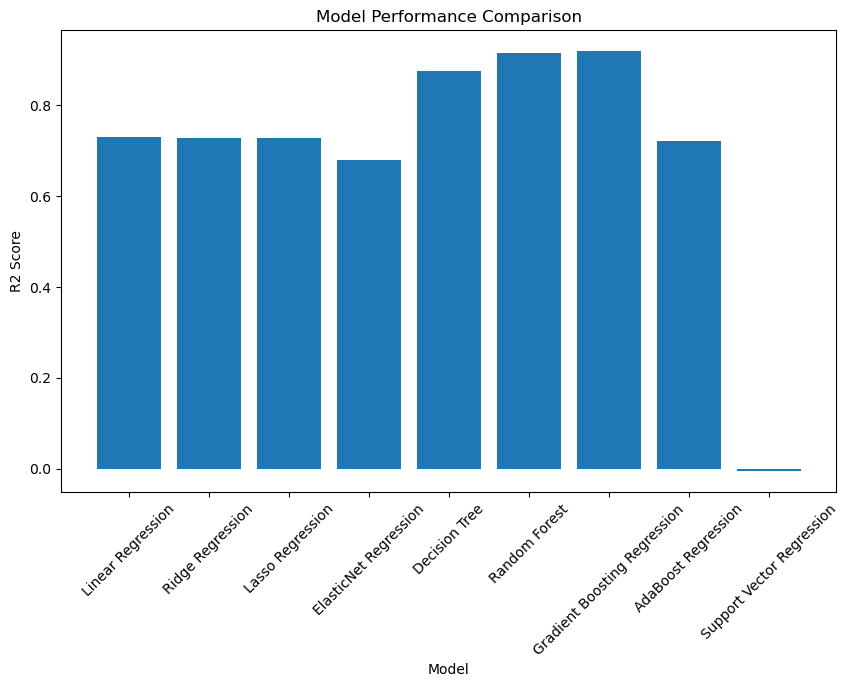

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# 데이터 로드
data = pd.read_csv("new_data.csv")

# 입력 특성과 타깃 변수 분리
X = data.drop(['price','model','Unnamed: 0'], axis=1)
y = data['price']

# 훈련 세트와 테스트 세트로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 입력 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 생성
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'AdaBoost Regression': AdaBoostRegressor(),
    'Support Vector Regression': SVR()
}

# 모델 학습 및 평가
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2

# 성능 비교 결과 출력
for name, r2 in results.items():
    print(f'{name}: R2 Score = {r2:.4f}')

# 모델 성능 비교 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()

Linear Regression: MSE = 258126.7897
Ridge Regression: MSE = 258417.5984
Lasso Regression: MSE = 259068.2246
ElasticNet Regression: MSE = 304918.3786
Decision Tree: MSE = 161352.3774
Random Forest: MSE = 90988.1357
Gradient Boosting Regression: MSE = 79142.4058
AdaBoost Regression: MSE = 266806.3640
Support Vector Regression: MSE = 956253.4568


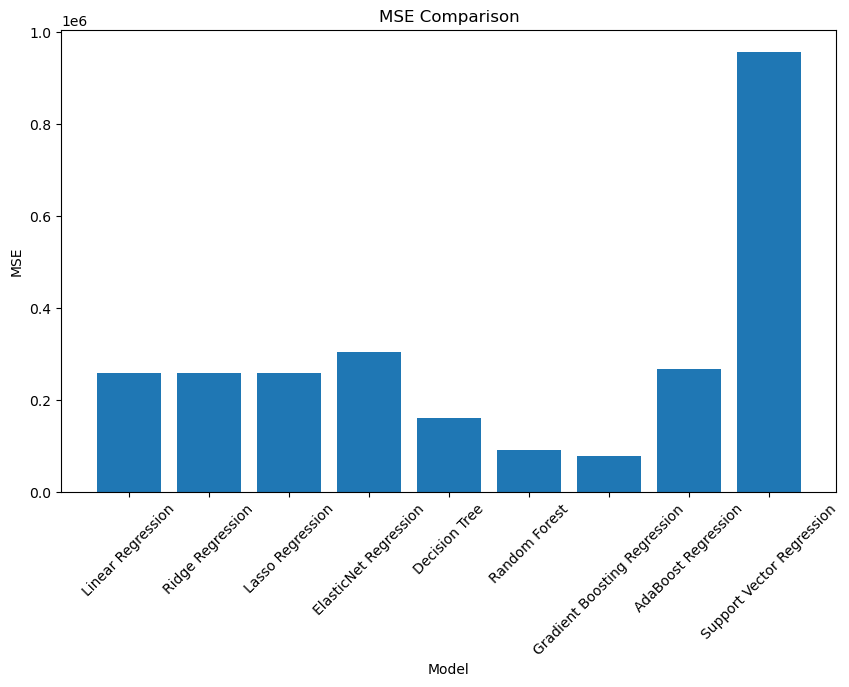

In [56]:
from sklearn.metrics import mean_squared_error

# 모델 생성 및 학습
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'AdaBoost Regression': AdaBoostRegressor(),
    'Support Vector Regression': SVR()
}

# 예측 결과 및 MSE 계산
results2 = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    results2[name] = mse

# 성능 비교 결과 출력
for name, mse in results2.items():
    print(f'{name}: MSE = {mse:.4f}')

# MSE 결과 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(results2.keys(), results2.values())
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE Comparison')
plt.xticks(rotation=45)
plt.show()

In [57]:
data2 = data

In [58]:
data2

,Unnamed: 0,model,year,distance,fuel,auto,efficiency,max_power,max_toque,method,insurance,is_genesis,price
0,0,현대 더 뉴 그랜저 하이브리드 2.4 HEV 르블랑,1.0,37983.0,1.0,1.0,16.2,200.0,25.1,0.0,4.0,0.0,3700.0
1,2,현대 더 뉴 그랜저 하이브리드 2.4 HEV 익스클루시브,3.0,43818.0,1.0,1.0,16.2,159.0,21.0,0.0,2.0,0.0,3469.0
2,3,현대 그랜저IG 2.4 프리미엄,5.0,61406.0,1.0,1.0,11.2,190.0,24.6,0.0,0.0,0.0,1940.0
3,4,현대 그랜저IG 하이브리드 2.4 HEV 익스클루시브,4.0,56098.0,1.0,1.0,16.2,199.0,26.7,0.0,0.0,0.0,2800.0
4,5,현대 그랜저IG 2.4 모던,5.0,47882.0,1.0,1.0,11.2,190.0,24.6,0.0,0.0,0.0,2099.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,1096,기아 K5 2.4 프레스티지,12.0,143667.0,1.0,1.0,13.0,201.0,25.5,0.0,4.0,0.0,630.0
523,1097,기아 K5 하이브리드 2세대 2.0 HEV 노블레스 스페셜,4.0,49500.0,1.0,1.0,17.0,191.0,27.0,0.0,3.0,0.0,2250.0
524,1098,기아 K5 2.0 프레스티지,12.0,161755.0,1.0,1.0,13.0,165.0,20.2,0.0,4.0,0.0,460.0
525,1099,기아 K5 하이브리드 2세대 2.0 HEV 프레스티지,6.0,83723.0,1.0,1.0,17.5,191.0,27.0,0.0,2.0,0.0,1690.0


In [59]:
data2 = data2.drop(['Unnamed: 0'], axis=1)
data2['model'] = data2['model'].str[:2]


In [60]:
data2

,model,year,distance,fuel,auto,efficiency,max_power,max_toque,method,insurance,is_genesis,price
0,현대,1.0,37983.0,1.0,1.0,16.2,200.0,25.1,0.0,4.0,0.0,3700.0
1,현대,3.0,43818.0,1.0,1.0,16.2,159.0,21.0,0.0,2.0,0.0,3469.0
2,현대,5.0,61406.0,1.0,1.0,11.2,190.0,24.6,0.0,0.0,0.0,1940.0
3,현대,4.0,56098.0,1.0,1.0,16.2,199.0,26.7,0.0,0.0,0.0,2800.0
4,현대,5.0,47882.0,1.0,1.0,11.2,190.0,24.6,0.0,0.0,0.0,2099.0
...,...,...,...,...,...,...,...,...,...,...,...,...
522,기아,12.0,143667.0,1.0,1.0,13.0,201.0,25.5,0.0,4.0,0.0,630.0
523,기아,4.0,49500.0,1.0,1.0,17.0,191.0,27.0,0.0,3.0,0.0,2250.0
524,기아,12.0,161755.0,1.0,1.0,13.0,165.0,20.2,0.0,4.0,0.0,460.0
525,기아,6.0,83723.0,1.0,1.0,17.5,191.0,27.0,0.0,2.0,0.0,1690.0


In [61]:
data2.loc[data2['model'] == '기아', 'model'] = 1
data2.loc[data2['model'] == '현대', 'model'] = 2


In [62]:
data2

,model,year,distance,fuel,auto,efficiency,max_power,max_toque,method,insurance,is_genesis,price
0,2,1.0,37983.0,1.0,1.0,16.2,200.0,25.1,0.0,4.0,0.0,3700.0
1,2,3.0,43818.0,1.0,1.0,16.2,159.0,21.0,0.0,2.0,0.0,3469.0
2,2,5.0,61406.0,1.0,1.0,11.2,190.0,24.6,0.0,0.0,0.0,1940.0
3,2,4.0,56098.0,1.0,1.0,16.2,199.0,26.7,0.0,0.0,0.0,2800.0
4,2,5.0,47882.0,1.0,1.0,11.2,190.0,24.6,0.0,0.0,0.0,2099.0
...,...,...,...,...,...,...,...,...,...,...,...,...
522,1,12.0,143667.0,1.0,1.0,13.0,201.0,25.5,0.0,4.0,0.0,630.0
523,1,4.0,49500.0,1.0,1.0,17.0,191.0,27.0,0.0,3.0,0.0,2250.0
524,1,12.0,161755.0,1.0,1.0,13.0,165.0,20.2,0.0,4.0,0.0,460.0
525,1,6.0,83723.0,1.0,1.0,17.5,191.0,27.0,0.0,2.0,0.0,1690.0


Linear Regression: R2 Score = 0.7240
Ridge Regression: R2 Score = 0.7236
Lasso Regression: R2 Score = 0.7232
ElasticNet Regression: R2 Score = 0.6766
Decision Tree: R2 Score = 0.8781
Random Forest: R2 Score = 0.9106
Gradient Boosting Regression: R2 Score = 0.9218
AdaBoost Regression: R2 Score = 0.7236
Support Vector Regression: R2 Score = -0.0116


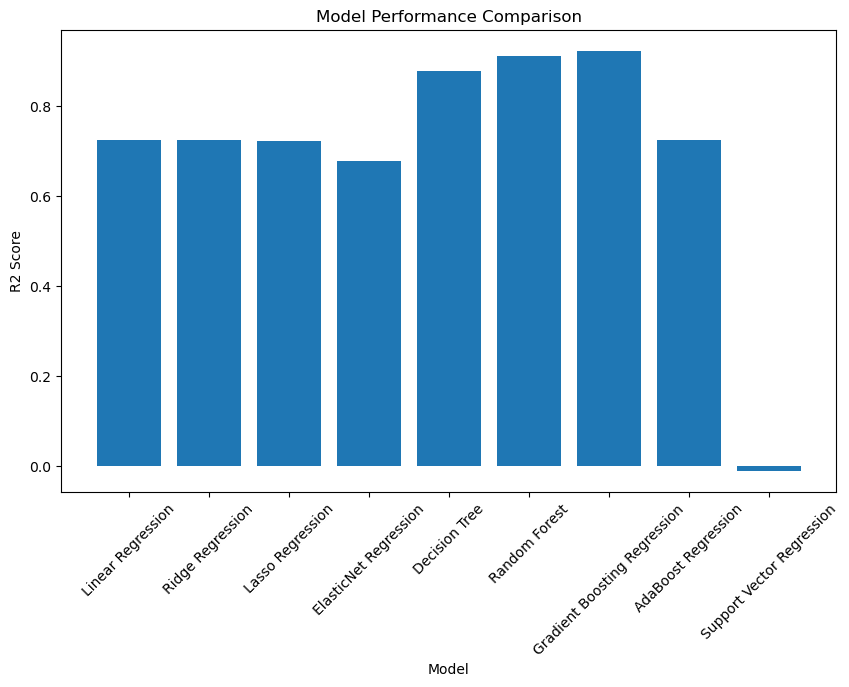

In [63]:

# 입력 특성과 타깃 변수 분리
X = data2.drop(['price', 'is_genesis'], axis=1)
y = data2['price']

# 훈련 세트와 테스트 세트로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 입력 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 생성
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'AdaBoost Regression': AdaBoostRegressor(),
    'Support Vector Regression': SVR()
}

# 모델 학습 및 평가
results3 = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    results3[name] = r2

# 성능 비교 결과 출력
for name, r2 in results3.items():
    print(f'{name}: R2 Score = {r2:.4f}')

# 모델 성능 비교 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(results3.keys(), results3.values())
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()

Linear Regression: MSE = 262574.2086
Ridge Regression: MSE = 262889.7169
Lasso Regression: MSE = 263328.2535
ElasticNet Regression: MSE = 307639.2386
Decision Tree: MSE = 124985.1698
Random Forest: MSE = 77106.8455
Gradient Boosting Regression: MSE = 74408.0593
AdaBoost Regression: MSE = 279608.0861
Support Vector Regression: MSE = 962212.4495


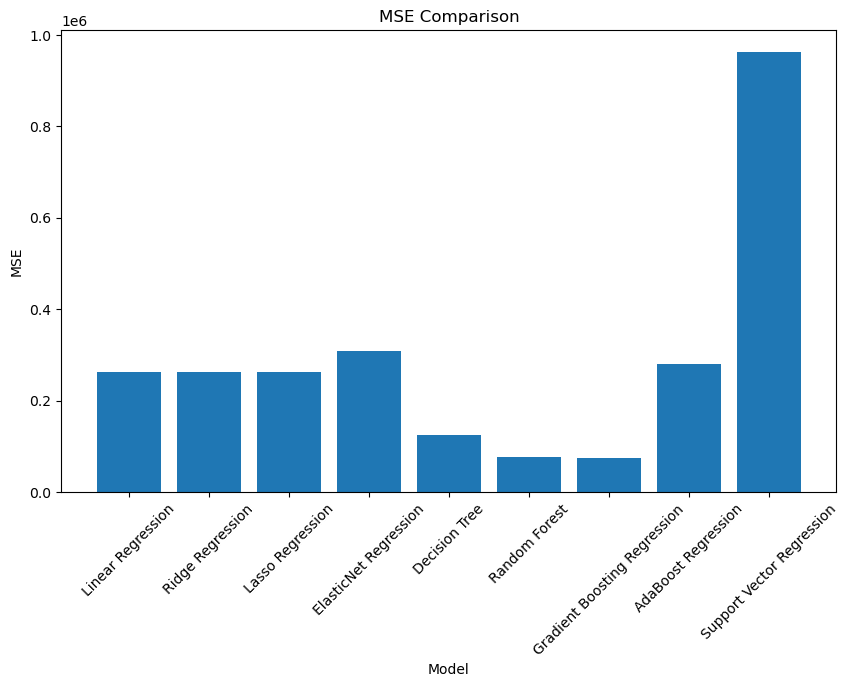

In [64]:
# 모델 생성 및 학습
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'AdaBoost Regression': AdaBoostRegressor(),
    'Support Vector Regression': SVR()
}

# 예측 결과 및 MSE 계산
results4 = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    results4[name] = mse

# 성능 비교 결과 출력
for name, mse in results4.items():
    print(f'{name}: MSE = {mse:.4f}')

# MSE 결과 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(results4.keys(), results4.values())
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE Comparison')
plt.xticks(rotation=45)
plt.show()

# GradientBoostRegressor 그래프, 변수중요도

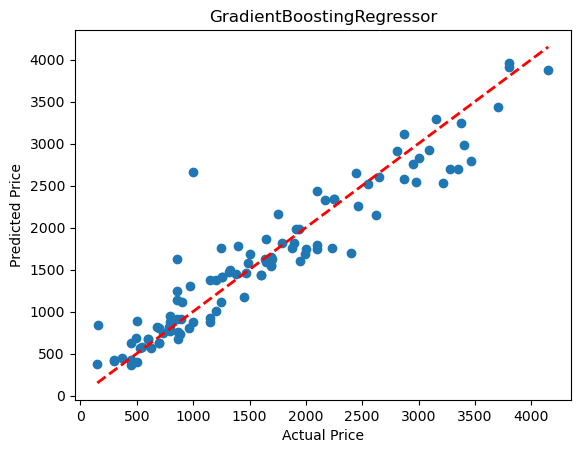

In [65]:
# 데이터 X에서 추가적으로 더미 변수들인 is_genesis, auto, method, fuel 변수들을 제거한 후 선형회귀

X = data2.drop(['price', 'is_genesis','auto','method','fuel'], axis=1)
y = data2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 입력 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_gbr = GradientBoostingRegressor()

model_gbr.fit(X_train, y_train)

# 훈련 데이터를 사용하여 모델 학습
model_gbr.fit(X_train, y_train)

# 테스트 데이터에 대한 예측값 계산
y_pred = model_gbr.predict(X_test)

# 산점도와 회귀선 시각화
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('GradientBoostingRegressor')
plt.show()

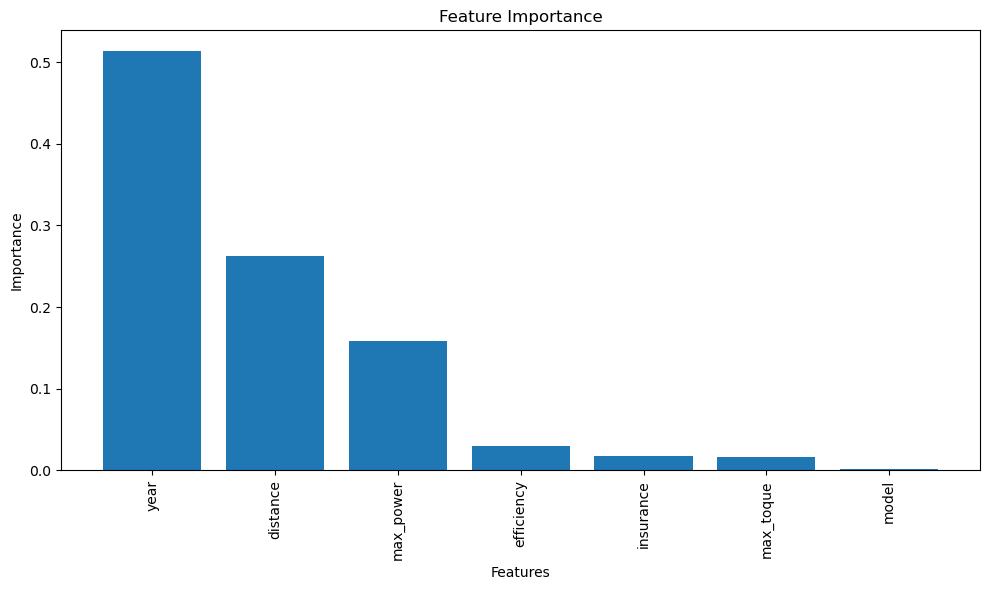

In [66]:
importances = model_gbr.feature_importances_
feature_names = data2.drop(['price', 'is_genesis', 'auto', 'method', 'fuel'], axis=1).columns

# 특성의 인덱스를 생성합니다.
indices = np.argsort(importances)[::-1]
# 특성의 이름을 가져옵니다.
feature_names = np.array(feature_names)

# 중요도가 큰 순서대로 특성의 이름을 정렬합니다.
sorted_feature_names = feature_names[indices]
# 중요도 값을 정렬합니다.
sorted_importances = importances[indices]

# 특성 중요도 그래프를 그립니다.
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), sorted_importances, align="center")
plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Linear Regression 그래프, 변수중요도

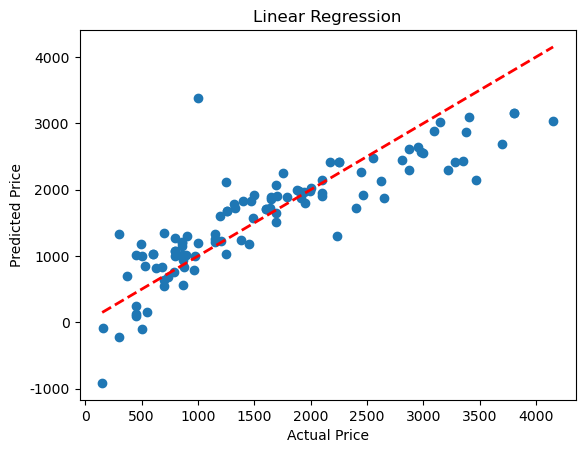

In [67]:
# 데이터 X에서 추가적으로 더미 변수들인 is_genesis, auto, method, fuel 변수들을 제거한 후 선형회귀

X = data2.drop(['price', 'is_genesis','auto','method','fuel'], axis=1)
y = data2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 입력 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train, y_train)
model = LinearRegression()

# 훈련 데이터를 사용하여 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측값 계산
y_pred = model.predict(X_test)

# 산점도와 회귀선 시각화
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression')
plt.show()

In [68]:
coefficients = model.coef_
intercept = model.intercept_

print("Intercept:", intercept)
for feature, coefficient in zip(X_train.columns, coefficients):
    print(feature, ":", coefficient)

Intercept: 767.9977091102313
model : -113.8863361842342
year : -121.36737133726253
distance : -0.00489450825487836
efficiency : 47.502695133602344
max_power : 8.353083058261015
max_toque : 8.557726903531194
insurance : -48.50202849172739


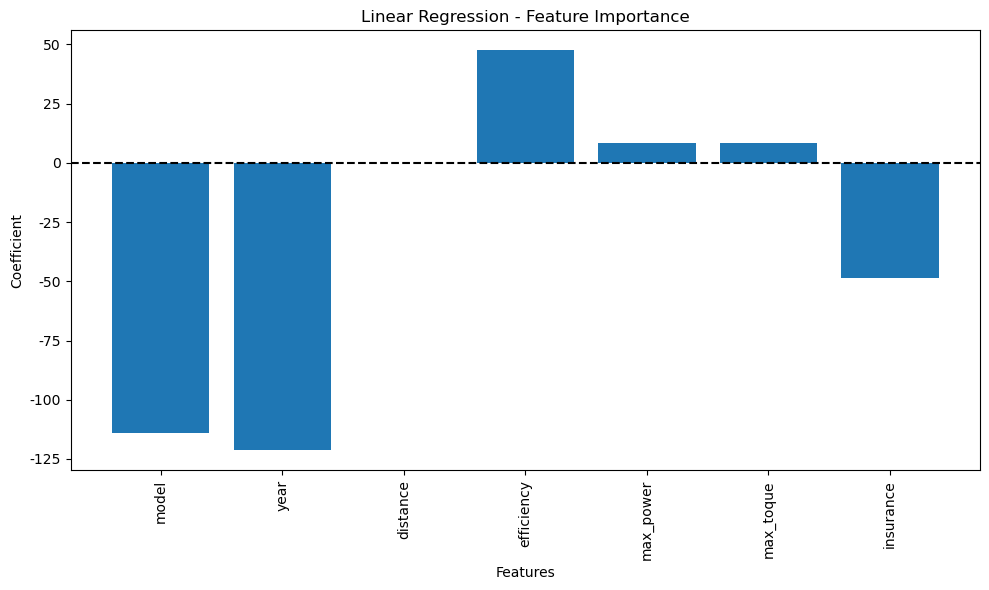

In [69]:
coefficients = model.coef_
intercept = model.intercept_

# 특성의 이름과 계수를 저장할 리스트 생성
feature_names = X_train.columns.tolist()
coefs = coefficients.tolist()

# 특성 중요도 그래프를 그립니다.
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefs)
plt.axhline(y=0, color='black', linestyle='--')  # y=0인 수평선 추가
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.title("Linear Regression - Feature Importance")
plt.tight_layout()
plt.show()

# Decision TREE

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from IPython.display import Image

X = data2.drop(['price', 'is_genesis', 'auto', 'method', 'fuel'], axis=1)
y = data2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor 모델을 생성하고 학습시킵니다.
model = DecisionTreeRegressor(max_depth=3, max_leaf_nodes=5)
model.fit(X_train, y_train)

# 트리를 그래프로 변환합니다.
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X_train.columns,
                           filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# 그래프를 이미지로 출력합니다.
image = graph.create_png()
Image(image)



ModuleNotFoundError: No module named 'graphviz'

# RandomFOREST 전체

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn import tree

# Assuming you have a DataFrame named 'data2' containing the data

X = data2.drop(['price', 'is_genesis', 'auto', 'method', 'fuel'], axis=1)
y = data2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor 모델 생성 및 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Random Forest 그래프 그리기
estimator = model.estimators_[0]
plt.figure(figsize=(10, 6))
plt.title("Random Forest Tree")
tree.plot_tree(estimator, feature_names=X.columns, filled=True)
plt.show()

# Feature 중요도 그래프 그리기
feature_importance = model.feature_importances_
indices = np.argsort(feature_importance)[::-1]
sorted_feature_names = X.columns[indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importance[indices])
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


#RandomForest 요약

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn import tree

# Assuming you have a DataFrame named 'data2' containing the data

X = data2.drop(['price', 'is_genesis', 'auto', 'method', 'fuel'], axis=1)
y = data2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor 모델 생성 및 학습
model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Random Forest 그래프 그리기
estimator = model.estimators_[0]
plt.figure(figsize=(6, 4))
plt.title("Random Forest Tree (Depth 3)")
tree.plot_tree(estimator, feature_names=X.columns, filled=True, max_depth=3)
plt.show()

# Feature 중요도 그래프 그리기
feature_importance = model.feature_importances_
indices = np.argsort(feature_importance)[::-1]
sorted_feature_names = X.columns[indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importance[indices])
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [71]:
import statsmodels.api as sm

# 상수항 추가
X_train_const = sm.add_constant(X_train_scaled)

# 선형 회귀 모델 생성
model = sm.OLS(y_train, X_train_const)
results = model.fit()

# 변수별 p-value 출력
print("변수\t\t\t\tp-value")
for feature, p_value in zip(X.columns, results.pvalues[1:]):
    print(f"{feature}\t\t\t{p_value:.4f}")
    
# 유의미한 변수로 model명 빼고는 모두 유의미한 변수

변수				p-value
model			0.0535
year			0.0000
distance			0.0000
efficiency			0.0003
max_power			0.0000
max_toque			0.0057
insurance			0.0002


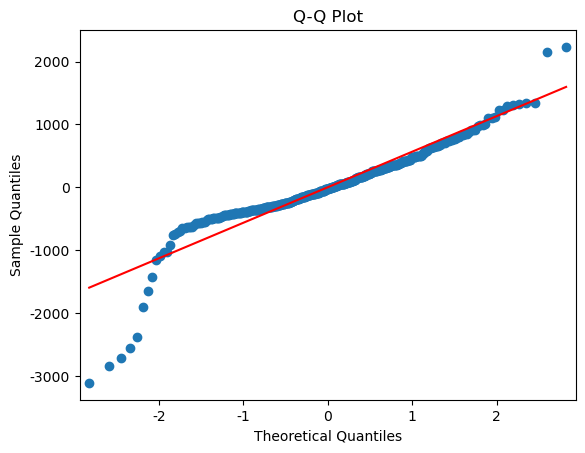

In [72]:
# q-q plot
# 비교적 선형적인 모양

import statsmodels.api as sm
import matplotlib.pyplot as plt

# 선형 회귀 모델 생성
model = sm.OLS(y_train, X_train_const)
results = model.fit()

# 잔차(residuals) 계산
residuals = results.resid

# Q-Q plot 그리기
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()